<a href="https://colab.research.google.com/github/jmerceron/AI-Activity/blob/main/F2P_Data_plot_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

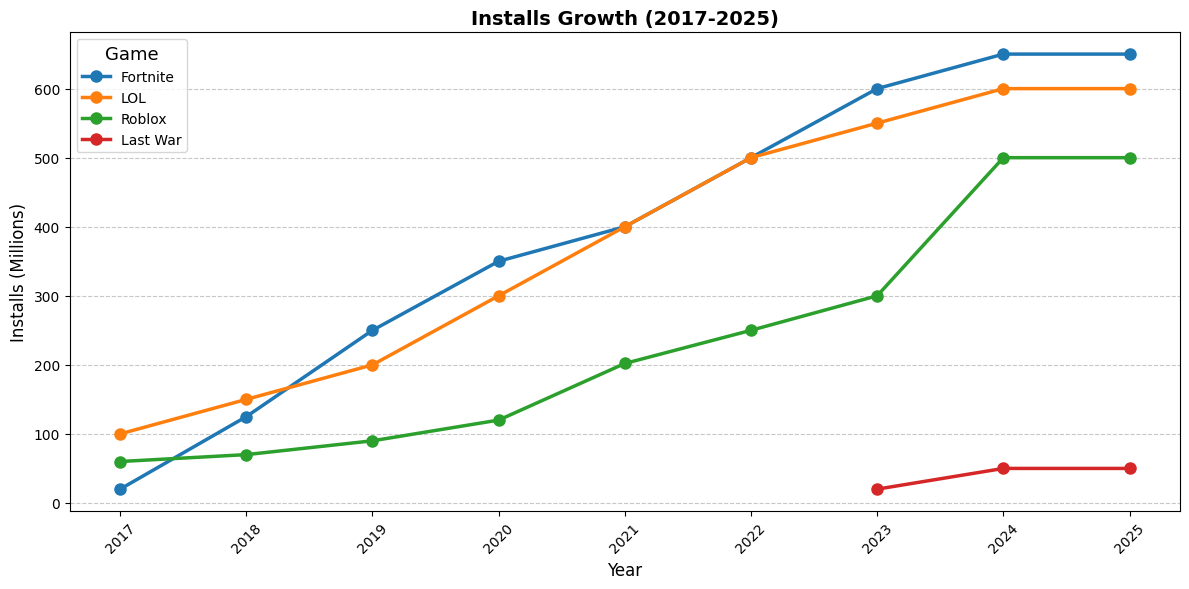

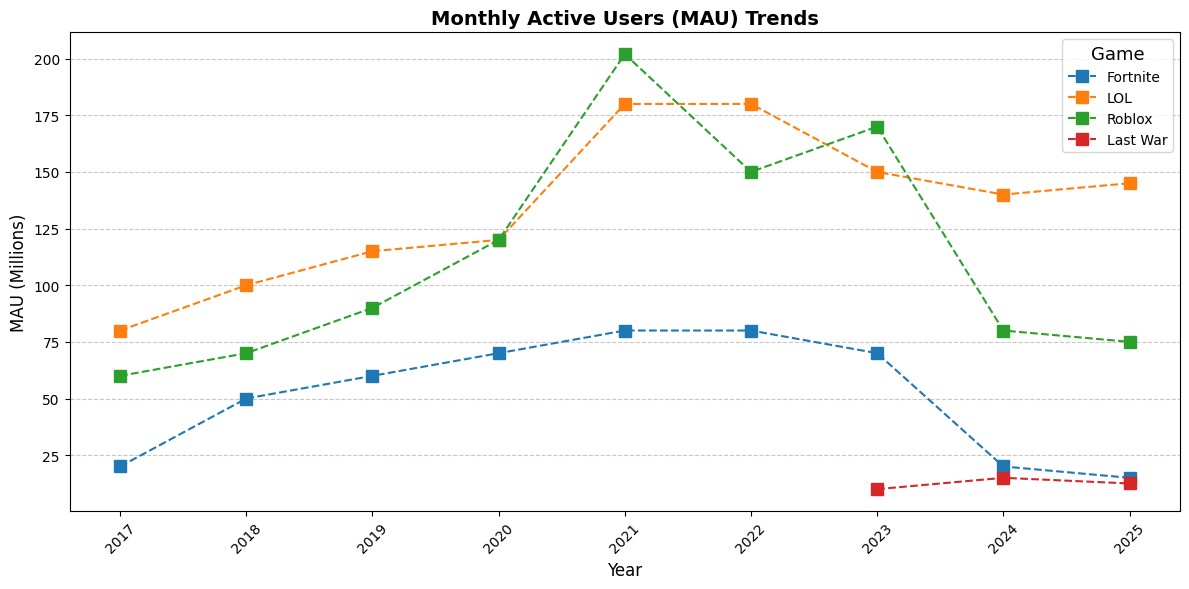

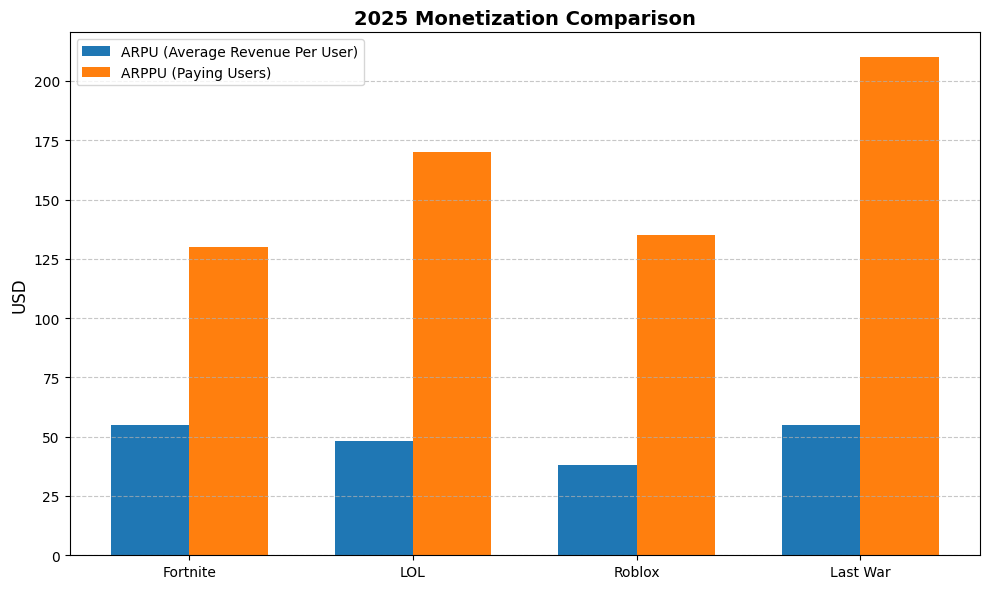

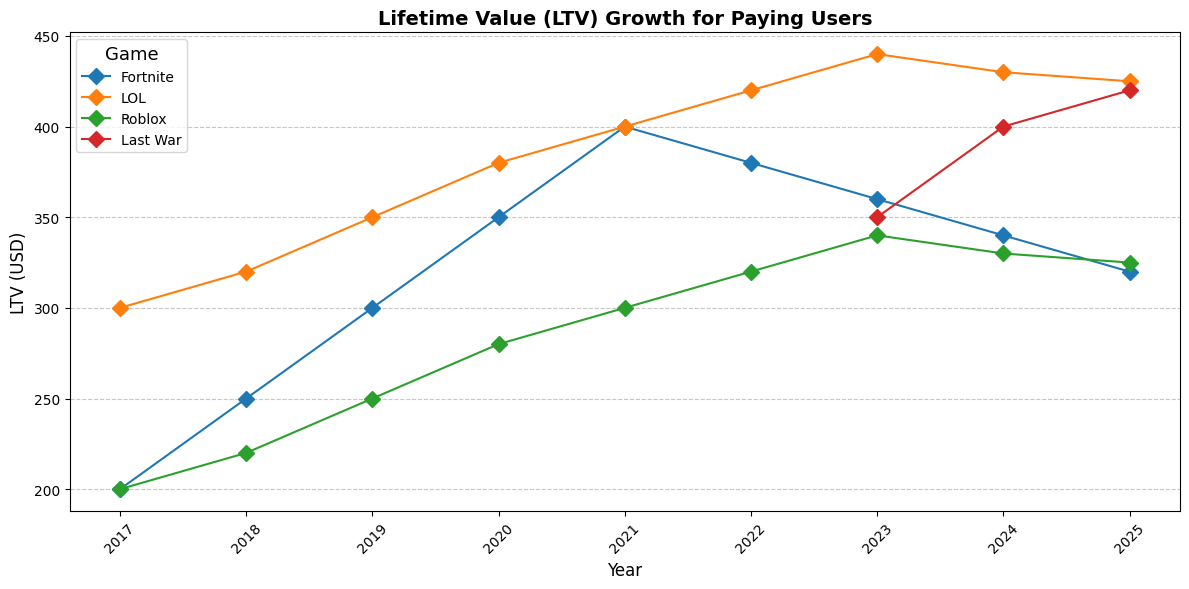

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ======================== FULL DATASET SETUP ========================
data = {
    'Game': ['Fortnite']*7 + ['LOL']*7 + ['Roblox']*7 + ['Last War']*7,
    'Metric': ['installs', 'Yearly Active Users', 'Monthly Paying Users', 'Yearly ARPU',
               'Yearly ARPPU', 'Monthly Active Users', 'LTV (Paying Users)'] * 4,
    '2017': [20, 15, 0.5, 20, 80, 20, 200] + [100, 70, 8, 25, 100, 80, 300] +
            [60, 50, 5, 20, 80, 60, 200] + [0]*7,
    '2018': [125, 45, 1.2, 35, 100, 50, 250] + [150, 90, 9, 30, 110, 100, 320] +
            [70, 60, 6, 25, 90, 70, 220] + [0]*7,
    '2019': [250, 55, 1.5, 45, 110, 60, 300] + [200, 110, 10, 35, 120, 115, 350] +
            [90, 80, 7, 30, 100, 90, 250] + [0]*7,
    '2020': [350, 65, 1.8, 60, 150, 70, 350] + [300, 115, 12, 40, 150, 120, 380] +
            [120, 110, 8, 35, 120, 120, 280] + [0]*7,
    '2021': [400, 75, 2.0, 75, 160, 80, 400] + [400, 170, 12.5, 45, 160, 180, 400] +
            [202, 180, 8.5, 38, 130, 202, 300] + [0]*7,
    '2022': [500, 75, 1.8, 70, 155, 80, 380] + [500, 170, 12, 50, 170, 180, 420] +
            [250, 140, 8, 40, 140, 150, 320] + [0]*7,
    '2023': [600, 65, 1.5, 65, 150, 70, 360] + [550, 160, 11, 55, 180, 150, 440] +
            [300, 160, 7.5, 42, 145, 170, 340] + [20, 15, 8, 35, 180, 10, 350],
    '2024': [650, 30, 1.0, 60, 140, 20, 340] + [600, 150, 10.5, 50, 175, 140, 430] +
            [500, 75, 7, 40, 140, 80, 330] + [50, 30, 12, 50, 200, 15, 400],
    '2025': [650, 25, 0.8, 55, 130, 15, 320] + [600, 145, 10, 48, 170, 145, 425] +
            [500, 75, 6.5, 38, 135, 75, 325] + [50, 25, 12.5, 55, 210, 12.5, 420]
}

df = pd.DataFrame(data).replace(0, np.nan)  # Replace 0 with NaN for cleaner plotting

# ======================== GRAPH 1: INSTALLS GROWTH ========================
plt.figure(figsize=(12, 6))
for game in df['Game'].unique():
    game_data = df[(df['Game'] == game) & (df['Metric'] == 'installs')]
    plt.plot(game_data.columns[2:], game_data.values[0][2:], label=game, linewidth=2.5, marker='o', markersize=8)
plt.title('Installs Growth (2017-2025)', fontsize=14, fontweight='bold')
plt.ylabel('Installs (Millions)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(title='Game', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ======================== GRAPH 2: MAU TRENDS ========================
plt.figure(figsize=(12, 6))
for game in df['Game'].unique():
    game_data = df[(df['Game'] == game) & (df['Metric'] == 'Monthly Active Users')]
    plt.plot(game_data.columns[2:], game_data.values[0][2:], label=game, linestyle='--', marker='s', markersize=8)
plt.title('Monthly Active Users (MAU) Trends', fontsize=14, fontweight='bold')
plt.ylabel('MAU (Millions)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(title='Game', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ======================== GRAPH 3: 2025 MONETIZATION ========================
arpu_2025 = [df[(df['Game'] == game) & (df['Metric'] == 'Yearly ARPU')]['2025'].values[0] for game in df['Game'].unique()]
arppu_2025 = [df[(df['Game'] == game) & (df['Metric'] == 'Yearly ARPPU')]['2025'].values[0] for game in df['Game'].unique()]

plt.figure(figsize=(10, 6))
x = np.arange(len(df['Game'].unique()))
width = 0.35
plt.bar(x - width/2, arpu_2025, width, label='ARPU (Average Revenue Per User)', color='#1f77b4')
plt.bar(x + width/2, arppu_2025, width, label='ARPPU (Paying Users)', color='#ff7f0e')
plt.title('2025 Monetization Comparison', fontsize=14, fontweight='bold')
plt.ylabel('USD', fontsize=12)
plt.xticks(x, df['Game'].unique())
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ======================== GRAPH 4: LTV EVOLUTION (PAYING USERS) ========================
plt.figure(figsize=(12, 6))
for game in df['Game'].unique():
    game_data = df[(df['Game'] == game) & (df['Metric'] == 'LTV (Paying Users)')]
    plt.plot(game_data.columns[2:], game_data.values[0][2:], label=game, marker='D', markersize=8)
plt.title('Lifetime Value (LTV) Growth for Paying Users', fontsize=14, fontweight='bold')
plt.ylabel('LTV (USD)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(title='Game', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

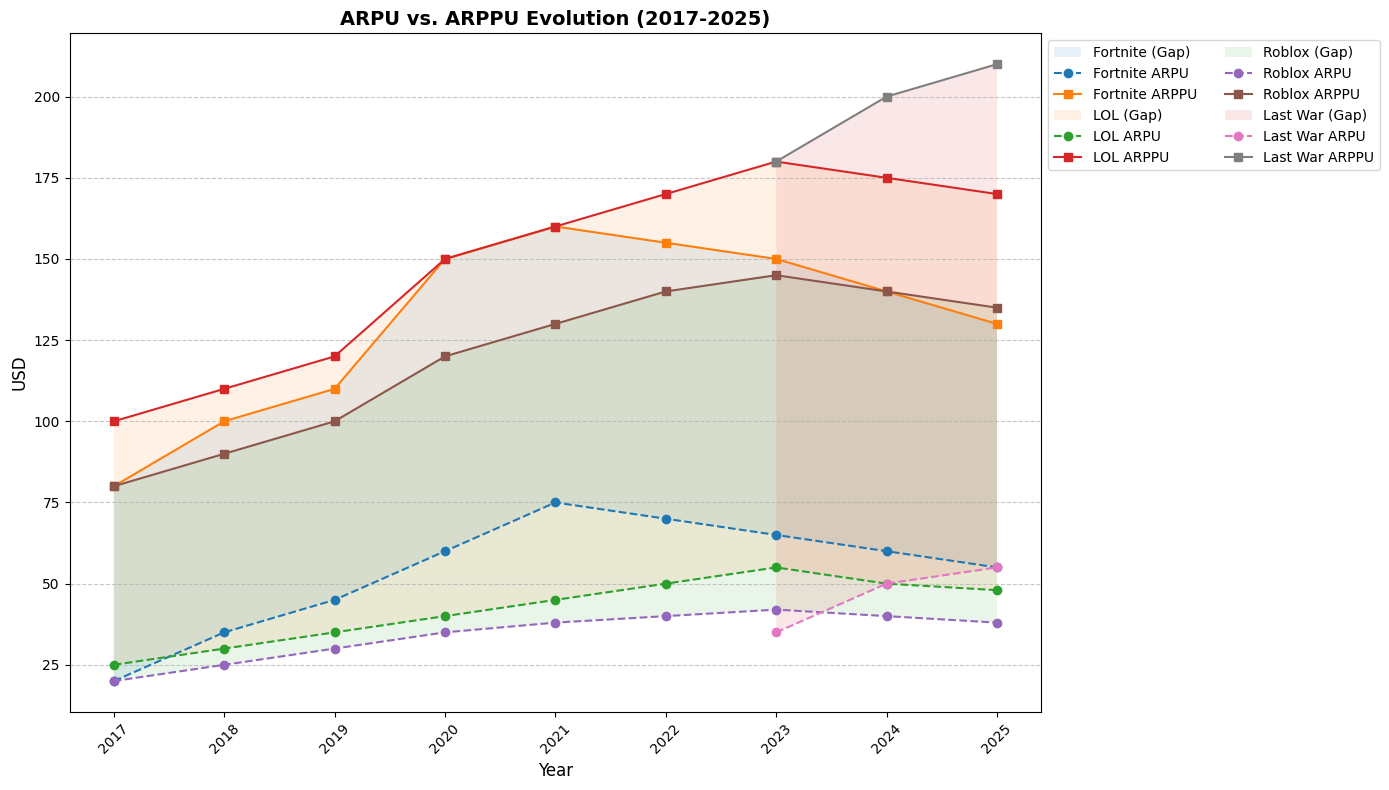

In [3]:
plt.figure(figsize=(14, 8))
for game in df['Game'].unique():
    # Extract ARPU and ARPPU data
    arpu = df[(df['Game'] == game) & (df['Metric'] == 'Yearly ARPU')].iloc[:, 2:].values[0]
    arppu = df[(df['Game'] == game) & (df['Metric'] == 'Yearly ARPPU')].iloc[:, 2:].values[0]
    years = df.columns[2:]

    # Plot ratio (ARPPU/ARPU) as area
    plt.fill_between(years, arpu, arppu, alpha=0.1, label=f'{game} (Gap)')

    # Plot lines
    plt.plot(years, arpu, label=f'{game} ARPU', linestyle='--', marker='o')
    plt.plot(years, arppu, label=f'{game} ARPPU', linestyle='-', marker='s')

plt.title('ARPU vs. ARPPU Evolution (2017-2025)', fontsize=14, fontweight='bold')
plt.ylabel('USD', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(ncol=2, bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

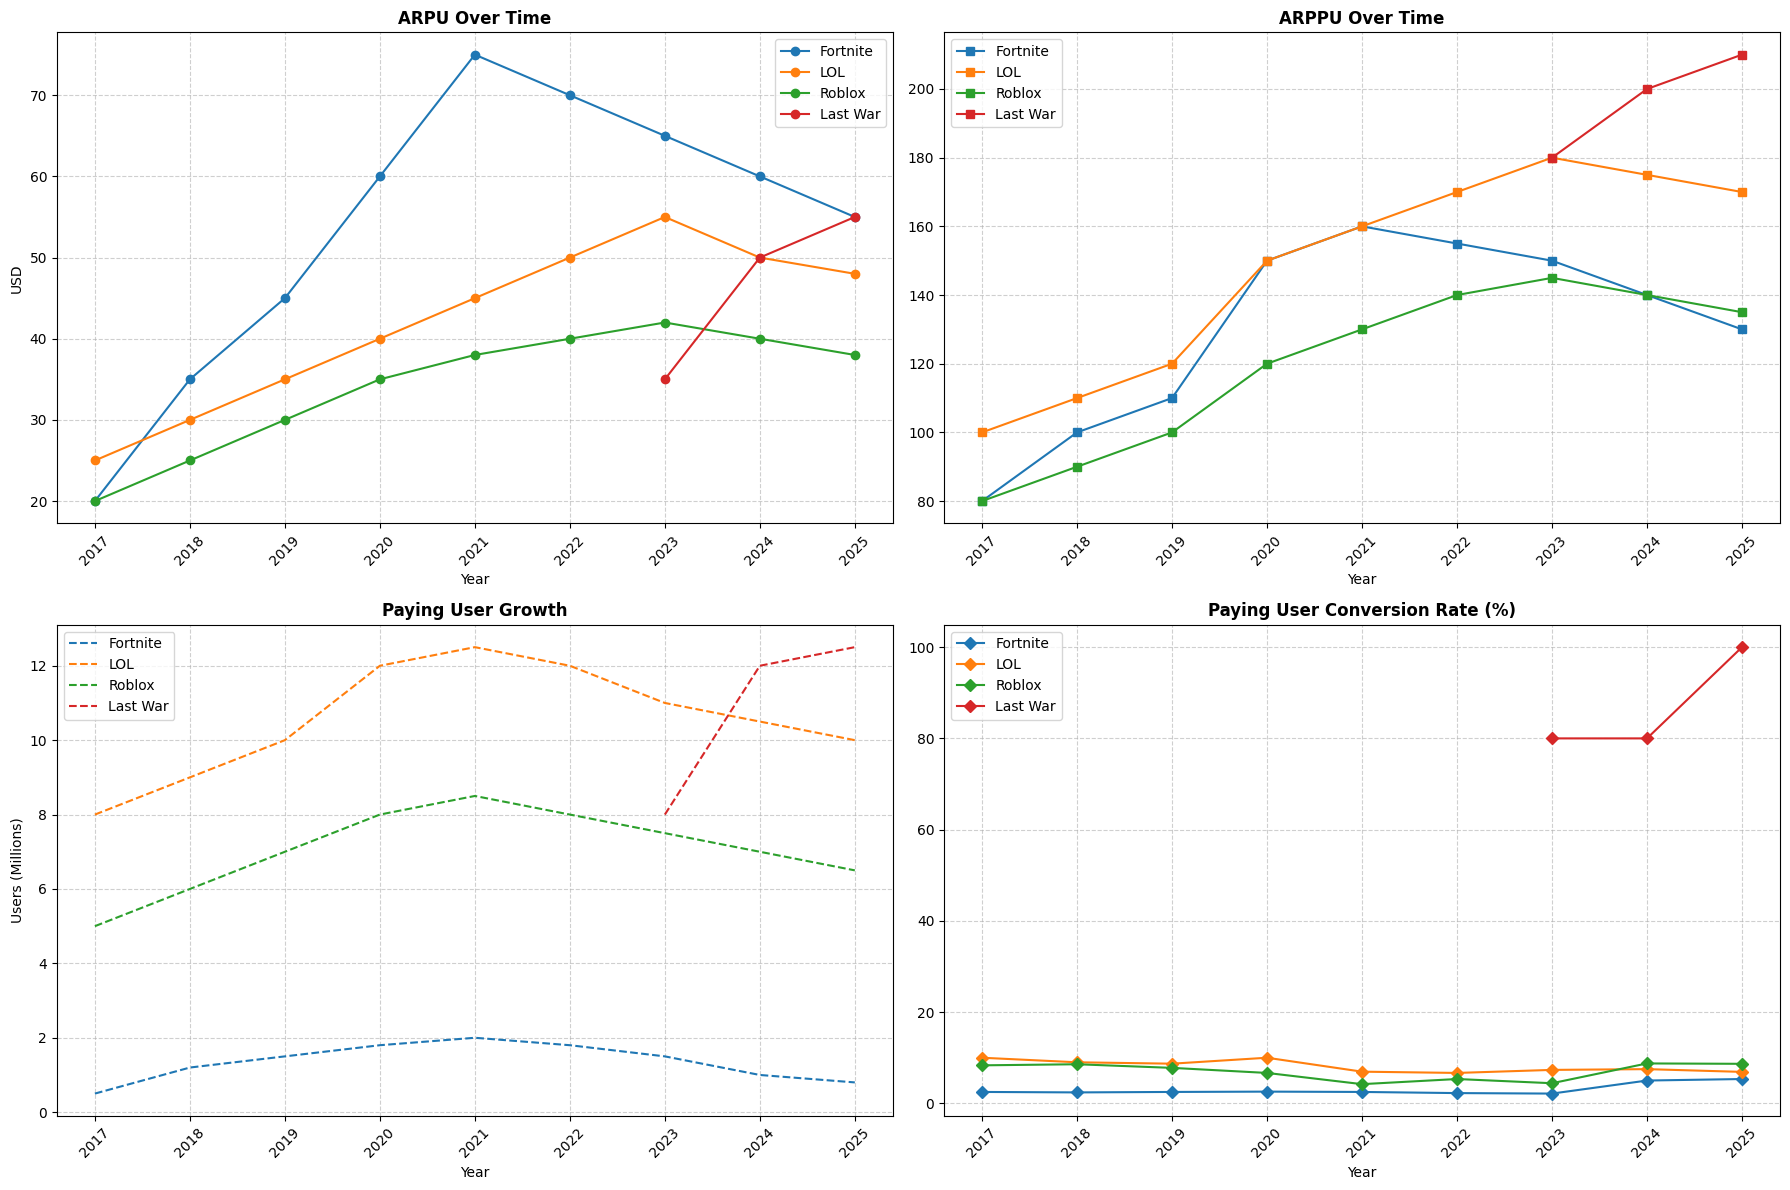

In [4]:
# Create a 2x2 dashboard
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Subplot 1: ARPU Trends
for game in df['Game'].unique():
    arpu = df[(df['Game'] == game) & (df['Metric'] == 'Yearly ARPU')].iloc[:, 2:].values[0]
    axes[0,0].plot(years, arpu, label=game, marker='o')
axes[0,0].set_title('ARPU Over Time', fontweight='bold')
axes[0,0].set_ylabel('USD')

# Subplot 2: ARPPU Trends
for game in df['Game'].unique():
    arppu = df[(df['Game'] == game) & (df['Metric'] == 'Yearly ARPPU')].iloc[:, 2:].values[0]
    axes[0,1].plot(years, arppu, label=game, marker='s')
axes[0,1].set_title('ARPPU Over Time', fontweight='bold')

# Subplot 3: Paying User Growth
for game in df['Game'].unique():
    paying = df[(df['Game'] == game) & (df['Metric'] == 'Monthly Paying Users')].iloc[:, 2:].values[0]
    axes[1,0].plot(years, paying, label=game, linestyle='--')
axes[1,0].set_title('Paying User Growth', fontweight='bold')
axes[1,0].set_ylabel('Users (Millions)')

# Subplot 4: Conversion Rates
for game in df['Game'].unique():
    mau = df[(df['Game'] == game) & (df['Metric'] == 'Monthly Active Users')].iloc[:, 2:].values[0]
    paying = df[(df['Game'] == game) & (df['Metric'] == 'Monthly Paying Users')].iloc[:, 2:].values[0]
    axes[1,1].plot(years, (paying/mau)*100, label=game, marker='D')
axes[1,1].set_title('Paying User Conversion Rate (%)', fontweight='bold')

# Style all subplots
for ax in axes.flat:
    ax.grid(linestyle='--', alpha=0.6)
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-5-1277798965.py:26: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ax.annotate(f'{conversion[i]:.1f}%', (yr, mau[i]),
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:1477: UserWarning: Warning: converting a masked element to nan.
  y = float(self.convert_yunits(y))


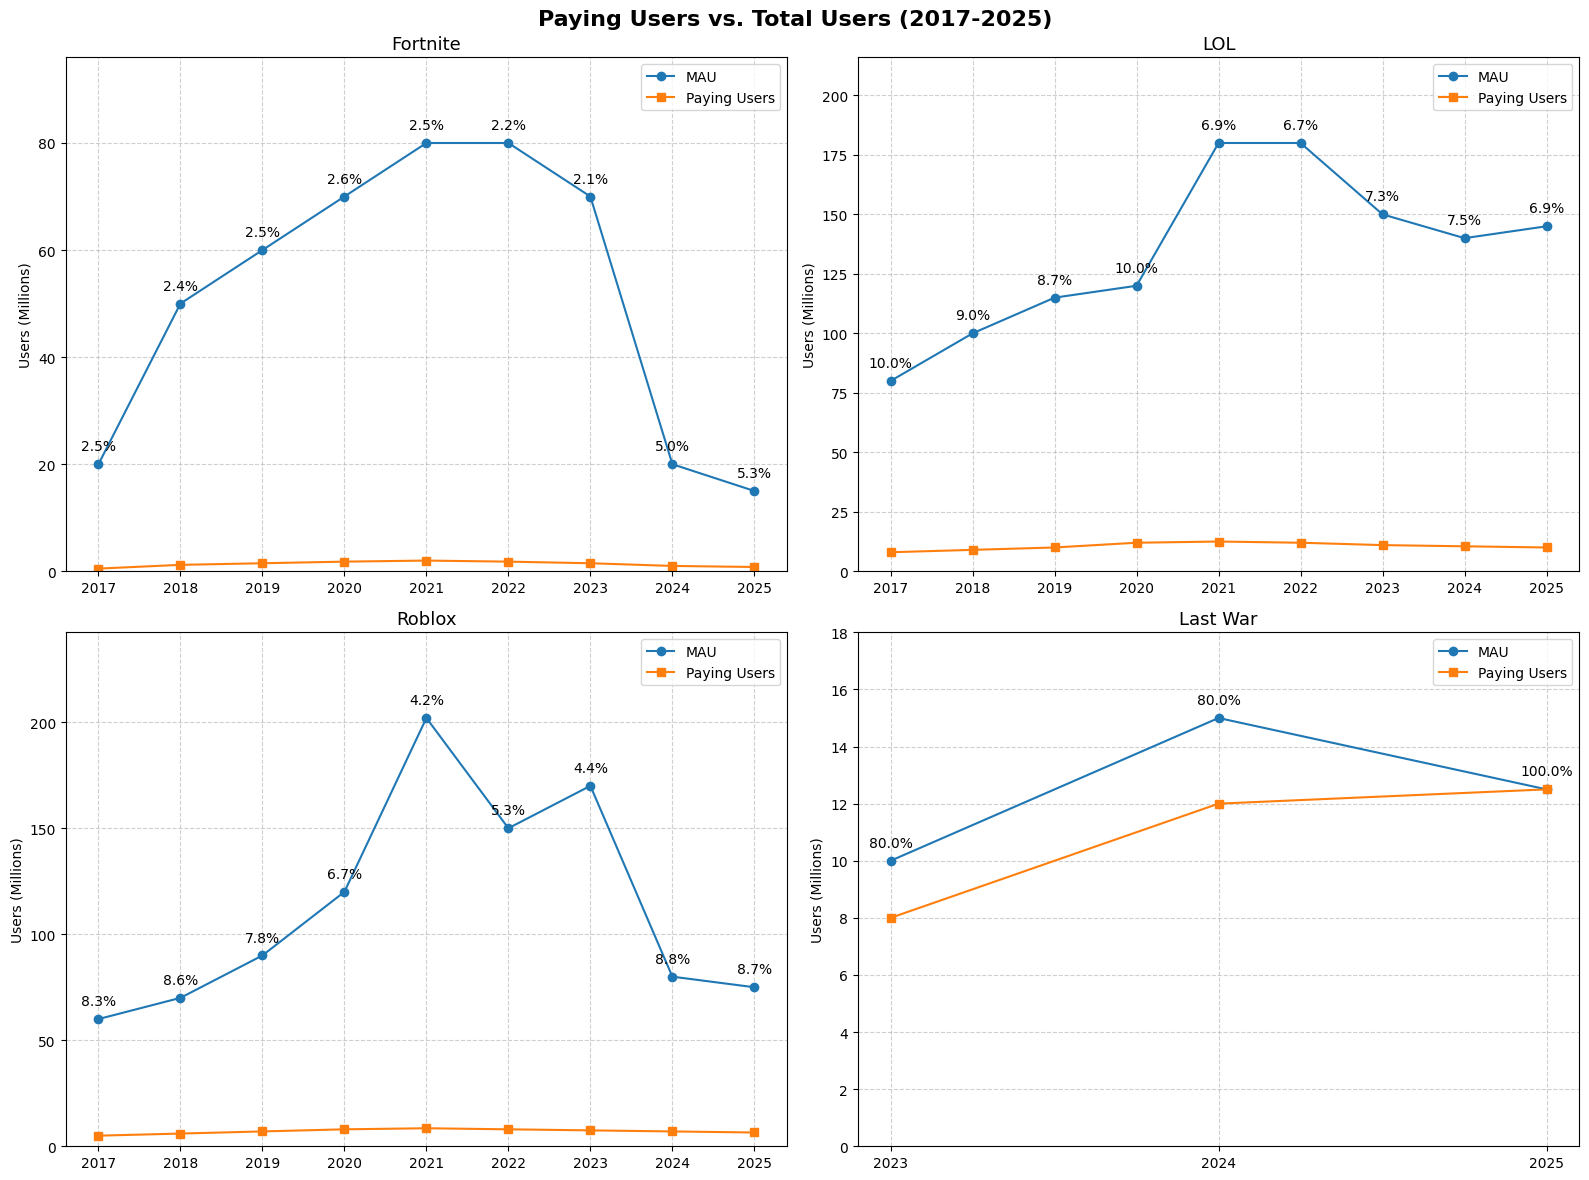

In [5]:
# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Paying Users vs. Total Users (2017-2025)', fontsize=16, fontweight='bold')

for idx, game in enumerate(df['Game'].unique()):
    ax = axes[idx//2, idx%2]

    # Get data (convert to numpy arrays for NaN handling)
    mau = df[(df['Game'] == game) & (df['Metric'] == 'Monthly Active Users')].iloc[:, 2:].values[0]
    paying = df[(df['Game'] == game) & (df['Metric'] == 'Monthly Paying Users')].iloc[:, 2:].values[0]
    years = df.columns[2:]

    # Convert to numpy arrays and mask NaNs
    mau = np.ma.masked_invalid(mau)
    paying = np.ma.masked_invalid(paying)

    # Plot lines (only valid data points)
    ax.plot(years, mau, label='MAU', color='#1f77b4', marker='o')
    ax.plot(years, paying, label='Paying Users', color='#ff7f0e', marker='s')

    # Calculate conversion rate (skip NaN/inf)
    with np.errstate(divide='ignore', invalid='ignore'):
        conversion = (paying / mau) * 100
        for i, yr in enumerate(years):
            if not (np.isnan(conversion[i]) or np.isinf(conversion[i])):
                ax.annotate(f'{conversion[i]:.1f}%', (yr, mau[i]),
                           textcoords="offset points", xytext=(0,10), ha='center')

    # Set y-axis limits (ignore NaN values)
    max_mau = np.nanmax(mau)  # Safely get max ignoring NaN
    if not np.isnan(max_mau):  # Only set limit if valid max exists
        ax.set_ylim(0, max_mau * 1.2)

    ax.set_title(game, fontsize=13)
    ax.set_ylabel('Users (Millions)')
    ax.legend()
    ax.grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()